# Algoritmo de clasificación

Desarrollar un árbol de decisión con el dataset propuesto para el proyecto final del curso.

In [ ]:
#Cargamos las librerías
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split

In [ ]:
#Cargo el dataset
df = pd.read_csv("https://github.com/LHukovsky/Coderhouse-Final-Project-/raw/main/encuesta-anual-hogares-2019.csv",
                 encoding="latin1")
df.head()

,id,nhogar,miembro,comuna,dominio,edad,sexo,parentesco_jefe,situacion_conyugal,num_miembro_padre,...,ingreso_per_capita_familiar,estado_educativo,sector_educativo,nivel_actual,nivel_max_educativo,años_escolaridad,lugar_nacimiento,afiliacion_salud,hijos_nacidos_vivos,cantidad_hijos_nac_vivos
0,1,1,1,5,Resto de la Ciudad,18,Mujer,Jefe,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,PBA excepto GBA,Solo obra social,No,No corresponde
1,1,1,2,5,Resto de la Ciudad,18,Mujer,Otro no familiar,Soltero/a,Padre no vive en el hogar,...,9000,Asiste,Estatal/publico,Universitario,Otras escuelas especiales,12,Otra provincia,Solo plan de medicina prepaga por contratación...,No,No corresponde
2,2,1,1,2,Resto de la Ciudad,18,Varon,Jefe,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Universitario,Otras escuelas especiales,12,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde
3,2,1,2,2,Resto de la Ciudad,50,Mujer,Padre/Madre/Suegro/a,Viudo/a,No corresponde,...,33333,No asiste pero asistió,No corresponde,No corresponde,Secundario/medio comun,17,CABA,Solo prepaga o mutual via OS,Si,2
4,2,1,3,2,Resto de la Ciudad,17,Varon,Otro familiar,Soltero/a,Padre no vive en el hogar,...,33333,Asiste,Privado religioso,Secundario/medio comun,EGB (1° a 9° año),10,CABA,Solo plan de medicina prepaga por contratación...,NaN,No corresponde


In [ ]:
#creo el Target, recategorizando la variables nivel_max_educativo en variables numéricas
df['Target'] = df['nivel_max_educativo']

df.loc[df['Target'].isin(['Secundario/medio comun','EGB (1° a 9° año)']),'Target'] = 3
df.loc[df['Target'].isin(['Primario especial','Primario comun']),'Target']         = 2
df.loc[df['Target']    == 'Sala de 5','Target']                                    = 1
df.loc[df['Target']    == 'Otras escuelas especiales','Target']                    = 4
df.loc[df['Target'].isin(['No corresponde','nan']),'Target']                       = np.nan

#Remplazo los valores de años_escolaridad para que todos sean numéricos
df.loc[df.años_escolaridad=="Ningun año de escolaridad aprobado","años_escolaridad"]=0
df["años_escolaridad"] = df["años_escolaridad"].astype('float')

#La variable "cantidad_hijos_nac_vivos" se puede pasar a numérica si se toma "no corresponde" como NAN.
df.loc[df.cantidad_hijos_nac_vivos=="No corresponde","cantidad_hijos_nac_vivos"]="0"
df["cantidad_hijos_nac_vivos"] = df["cantidad_hijos_nac_vivos"].apply(int)

#Hay determinadas variables (comuna,id,nhogar y miembro) que están como numéricas pero deberían ser categóricas.
df[["comuna","id","nhogar","miembro"]] = df[["comuna","id","nhogar","miembro"]].applymap(str)

#Reagrupamos la variable comuna por regiones para reducir la dimensionalidad
df['region'] = df['comuna']
df.loc[df['comuna'].isin(['12','13','14','2','15']),'region'] = 'norte'
df.loc[df['comuna'].isin(['5','3','1']),'region'] = 'centro'
df.loc[df['comuna'].isin(['8','4']),'region'] = 'sur'
df.loc[df['comuna'].isin(['6','7','9','10','11']),'region'] = 'oeste'

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14319 entries, 0 to 14318
Data columns (total 33 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   id                           14319 non-null  object 
 1   nhogar                       14319 non-null  object 
 2   miembro                      14319 non-null  object 
 3   comuna                       14319 non-null  object 
 4   dominio                      14319 non-null  object 
 5   edad                         14319 non-null  int64  
 6   sexo                         14319 non-null  object 
 7   parentesco_jefe              14319 non-null  object 
 8   situacion_conyugal           14318 non-null  object 
 9   num_miembro_padre            14319 non-null  object 
 10  num_miembro_madre            14319 non-null  object 
 11  estado_ocupacional           14319 non-null  object 
 12  cat_ocupacional              14319 non-null  object 
 13  calidad_ingresos

## División de train y test

In [ ]:
#creo un dataset train y otro test 70-30 %%
train, test = train_test_split(df, test_size = 0.30,random_state=50)

In [ ]:
#Armo una función para tener una lista limpia de variables con nulos
def info_nulos(data:pd.DataFrame):
    nulos = data.isnull().sum().where(lambda x:x>0).dropna().apply(int).sort_values()
    if len(nulos)>0:
        print(f'Variables con valores nulos:\n\n{nulos}')
    else: print(f'El dataset no tiene valores nulos')

In [ ]:
info_nulos(train)

Variables con valores nulos:

situacion_conyugal        1
sector_educativo          1
afiliacion_salud          3
años_escolaridad         46
nivel_max_educativo     733
Target                  764
hijos_nacidos_vivos    5395
dtype: int64


In [ ]:
info_nulos(test)

Variables con valores nulos:

lugar_nacimiento          1
afiliacion_salud          1
sector_educativo          2
años_escolaridad         16
nivel_max_educativo     321
Target                  332
hijos_nacidos_vivos    2389
dtype: int64


## Train

### Tratamiento de Nulos

#### años_escolaridad 

In [ ]:
#reemplazo los nulos con la mediana por comuna y sexo

#creo datarrame de referencia
anios_escol_ref_null = train.groupby(['sexo', 'comuna']).median()['años_escolaridad'].reset_index()
anios_escol_ref_null

#funcion de replace en base a dataframe agrupado
def fill_na_escol_grouped(df_grouped , row_replace):
  if pd.isna(row_replace['años_escolaridad']):
    return df_grouped[(df_grouped['sexo'] == row_replace['sexo']) & (df_grouped['comuna'] == row_replace['comuna'])]['años_escolaridad'].values[0]
  else:
    return row_replace['años_escolaridad']

#transformacion de train
train['años_escolaridad'] = train.apply(lambda row: fill_na_escol_grouped(anios_escol_ref_null, row), axis=1)

#### Variable remplazadas con moda

In [ ]:
#variables que voy a reemplazar simplemente con la moda 
#lugar_nacimiento, situacion_conyugal, afiliacion_salud

cols_rem_nulls = ['lugar_nacimiento', 'situacion_conyugal', 'afiliacion_salud', 'sector_educativo', 'hijos_nacidos_vivos']
moda_variables= train.filter(cols_rem_nulls).mode()
train[cols_rem_nulls]=train[cols_rem_nulls].fillna(train.mode().iloc[0])

info_nulos(train)

Variables con valores nulos:

nivel_max_educativo    733
Target                 764
dtype: int64


#### Target

Como no pude reemplazar los nulos del target del train, los voy a eliminar para poder seguir con la actividad.

In [ ]:
#De paso elimino la columna q ya no vamos a utilizar porq tenemos el target
train.drop(axis=1, columns='nivel_max_educativo', inplace=True)

#como solamente quedan los nulos del target elimino en todo el train
train.dropna(axis=0, inplace=True)
#Paso a numérico
train['Target']=train.Target.astype(int)

In [ ]:
info_nulos(train)

El dataset no tiene valores nulos


## Entrenamiento

### Hot One Encoding

In [ ]:
from sklearn.preprocessing import OneHotEncoder

#### Borrado de variables

In [ ]:
# Hay variables que no aportan nada entonces las saco
train.drop(axis=1, columns=['id','nhogar', 'miembro', 'parentesco_jefe', 'num_miembro_padre', 'num_miembro_padre',
                            'num_miembro_madre','cat_ocupacional','calidad_ingresos_lab', 
                            'calidad_ingresos_no_lab', 'calidad_ingresos_totales',
                            'calidad_ingresos_familiares', 'calidad_ingresos_familiares',
                            'hijos_nacidos_vivos', 
                            'estado_educativo','comuna','nivel_actual'
                            ], inplace=True)

In [ ]:
train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 9259 entries, 6123 to 14000
Data columns (total 18 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   dominio                      9259 non-null   object 
 1   edad                         9259 non-null   int64  
 2   sexo                         9259 non-null   object 
 3   situacion_conyugal           9259 non-null   object 
 4   estado_ocupacional           9259 non-null   object 
 5   ingreso_total_lab            9259 non-null   int64  
 6   ingreso_total_no_lab         9259 non-null   int64  
 7   ingresos_totales             9259 non-null   int64  
 8   ingresos_familiares          9259 non-null   int64  
 9   ingreso_per_capita_familiar  9259 non-null   int64  
 10  sector_educativo             9259 non-null   object 
 11  nivel_max_educativo          9259 non-null   object 
 12  años_escolaridad             9259 non-null   float64
 13  lugar_nacimien

In [ ]:
info_nulos(train)

El dataset no tiene valores nulos


#### Encoding

In [ ]:
encoder = OneHotEncoder(handle_unknown='ignore', #ponemos ignore para poder ommitir cuando puede pasar que no exista los mismos valores 
                        sparse=False) # generarlo como. matrix para poder generar las columnas adecuadas

#Variables que pasaremos al encoding
categoricas = ['region', 'dominio', 'sexo', 'situacion_conyugal', 'sector_educativo',
                'estado_ocupacional','afiliacion_salud','lugar_nacimiento']

#Hay muchas variables categoricas que transformar 
#entrenamiento para genera el preprocesamiento one hot encoding para las variables indicadas
encoder.fit(train[categoricas])

#transformo en train datasets en base a la clase generada
cat_encoding = pd.DataFrame(encoder.transform(train[categoricas]), 
                            columns=encoder.get_feature_names(categoricas))
cat_encoding.head()

#joineo de las variables que deseo con categoricas encoding
df_all_train = pd.concat([train, cat_encoding], axis=1, join='inner')
df_all_train.drop(categoricas,axis=1, inplace=True)

/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
cat_encoding.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9259 entries, 0 to 9258
Data columns (total 34 columns):
 #   Column                                                                      Non-Null Count  Dtype  
---  ------                                                                      --------------  -----  
 0   region_centro                                                               9259 non-null   float64
 1   region_norte                                                                9259 non-null   float64
 2   region_oeste                                                                9259 non-null   float64
 3   region_sur                                                                  9259 non-null   float64
 4   dominio_Resto de la Ciudad                                                  9259 non-null   float64
 5   dominio_Villas de emergencia                                                9259 non-null   float64
 6   sexo_Mujer                                      

In [ ]:
info_nulos(df_all_train)

El dataset no tiene valores nulos


### División de X e Y

In [ ]:
#spliteo de datos en target y features for test and train

#seleccion de x values sin el target
X_train = df_all_train.loc[:,df_all_train.columns != 'Target']

#seleccion del target
y_train = df_all_train.Target

### Modelado

In [ ]:
#training del modelo
from sklearn import tree

model_default = tree.DecisionTreeClassifier(random_state = 50) # con hiperparametros default
model_default.fit(X_train, y_train)

#modelo generado con algun hiperparamtros diferente
model_max_depth = tree.DecisionTreeClassifier(random_state = 50, max_depth=10) 
model_max_depth.fit(X_train, y_train)

DecisionTreeClassifier(max_depth=10, random_state=50)

## Prediccion

Aplicamos los cambios hechos en el train al test

### Tratamiento de nulos

In [ ]:
#años_escolaridad 
#reemplazo los nulos con la mediana por comuna


#transformacion de test 
test['años_escolaridad'] = test.apply(lambda row: fill_na_escol_grouped(anios_escol_ref_null, row), axis=1)

#lugar_nacimiento, situacion_conyugal, afiliacion_salud

# cols_rem_nulls = ['lugar_nacimiento', 'situacion_conyugal', 'afiliacion_salud', 'sector_educativo', 'hijos_nacidos_vivos']
moda_variables_test= test.filter(cols_rem_nulls).mode()
test[cols_rem_nulls]=test[cols_rem_nulls].fillna(test.mode().iloc[0])

#De paso elimino la columna q ya no vamos a utilizar porq tenemos el target
test.drop(axis=1, columns='nivel_max_educativo', inplace=True)

#como solamente quedan los nulos del target elimino en todo el train
test.dropna(axis=0, inplace=True)

#chequeo
test.isnull().sum()
test['Target']=test.Target.astype(int)

### One hot encoding

In [ ]:
test.drop(axis=1, columns=['id','nhogar', 'miembro', 'parentesco_jefe', 'num_miembro_padre', 'num_miembro_padre','num_miembro_madre', 
                            #'estado_ocupacional', 
                            'cat_ocupacional', 
                            'calidad_ingresos_lab', 'calidad_ingresos_no_lab', 'calidad_ingresos_totales',
                            'calidad_ingresos_familiares', 'calidad_ingresos_familiares',
                            #'afiliacion_salud',
                            'hijos_nacidos_vivos', 
                            'estado_educativo','comuna','nivel_actual'
                            #'lugar_nacimiento'
                            ], inplace=True)

In [ ]:
info_nulos(test)

El dataset no tiene valores nulos


In [ ]:
#la primera parte del encoding ya esta hecha
cat_encoding_test = pd.DataFrame(encoder.transform(test[categoricas]), 
                            columns=encoder.get_feature_names(categoricas))
cat_encoding_test.head()

#joineo de las variables que deseo con categoricas encoding
df_all_test = pd.concat([test, cat_encoding], axis=1, join='inner')
df_all_test.drop(categoricas,axis=1, inplace=True)


/usr/local/lib/python3.7/dist-packages/sklearn/utils/deprecation.py:87: FutureWarning: Function get_feature_names is deprecated; get_feature_names is deprecated in 1.0 and will be removed in 1.2. Please use get_feature_names_out instead.
  warnings.warn(msg, category=FutureWarning)


In [ ]:
info_nulos(df_all_test)

El dataset no tiene valores nulos


### División de X e Y

In [ ]:
# spliteo de datos y target del test
X_test = df_all_test.loc[:,df_all_test.columns != 'Target'] 
y_test = df_all_test.Target

## Prueba

In [ ]:
#prediccion
y_pred_test = model_max_depth.predict(X_test)
y_pred_test

array([3, 2, 2, ..., 1, 4, 4])

### Acuracy

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score

#accuracy
print('Accuracy score for test data is:', accuracy_score(y_test,y_pred_test))

confusion_matrix = pd.DataFrame(confusion_matrix(y_test, y_pred_test))

confusion_matrix.index = ['Inicial','Primario', 'Secundario', 'Superior']
confusion_matrix.columns = ['Predicc. Inicial','Predicc. Primario', 'Predicc. Secundario', 'Predicc. Superior']
confusion_matrix

Accuracy score for test data is: 0.9208080808080809


,Predicc. Inicial,Predicc. Primario,Predicc. Secundario,Predicc. Superior
Inicial,375,1,0,0
Primario,0,395,11,43
Secundario,0,15,1147,5
Superior,0,70,51,362


Hacemos una evaluación con el classification report

In [ ]:
from sklearn.metrics import classification_report, f1_score

print(classification_report(y_test, y_pred_test))

              precision    recall  f1-score   support

           1       1.00      1.00      1.00       376
           2       0.82      0.88      0.85       449
           3       0.95      0.98      0.97      1167
           4       0.88      0.75      0.81       483

    accuracy                           0.92      2475
   macro avg       0.91      0.90      0.91      2475
weighted avg       0.92      0.92      0.92      2475



En general las métricas dan muy bien. Queda por analizar si las variables están siendo bien elegidas.

## Gráficos

### Confusion matrix

/usr/local/lib/python3.7/dist-packages/yellowbrick/classifier/base.py:234: YellowbrickWarning: could not determine class_counts_ from previously fitted classifier
  YellowbrickWarning,


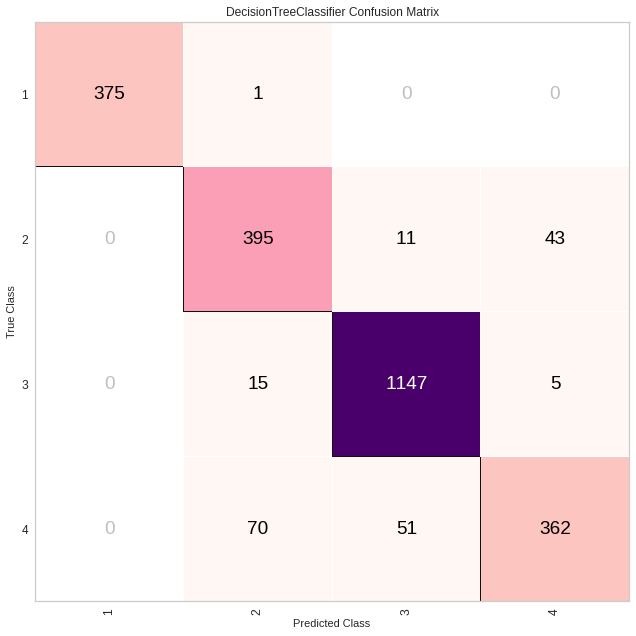

In [ ]:
#graficar la matrix
from yellowbrick.classifier import ConfusionMatrix
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize=(9,9))
cm = ConfusionMatrix(model_max_depth, cmap='RdPu')
cm.score(X_test, y_test)
for label in cm.ax.texts:
    label.set_size(19)
cm.poof()

### Visualización del arbol

In [ ]:
import pydotplus #pip install pydotplus
from sklearn.tree import export_graphviz

def tree_graph_to_png(tree, feature_names, class_names, png_file_to_save):
    tree_str = export_graphviz(
        tree,
        out_file=None,
        feature_names=feature_names,
        class_names=class_names,
        rounded=True)
    
    graph = pydotplus.graph_from_dot_data(tree_str)  
    graph.write_png(png_file_to_save)

#lista de variables
list_features = [x for x in df_all_train.columns if x != 'Target']
tree_graph_to_png(model_max_depth, list_features, df_all_train.Target.unique().astype(str), 'model.png')

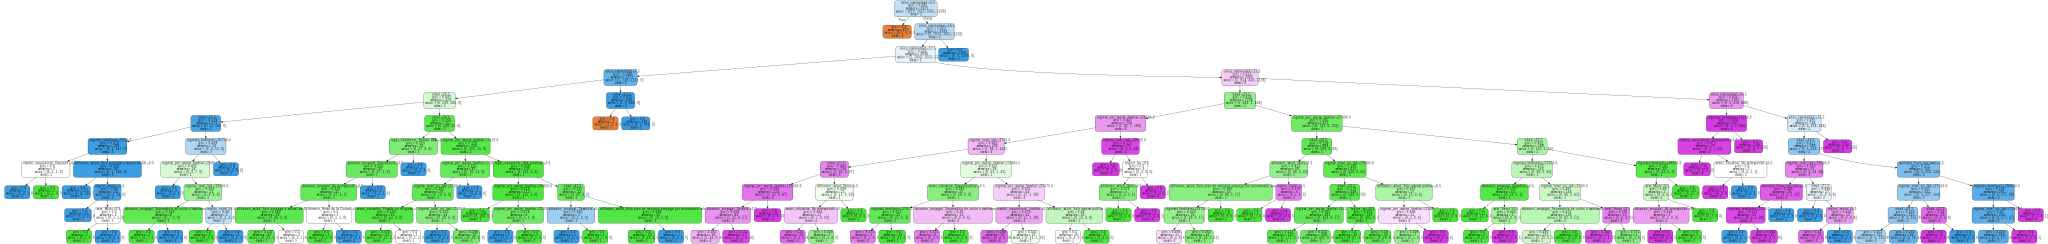

<Figure size 1440x720 with 0 Axes>

In [ ]:
import graphviz
from sklearn.tree import DecisionTreeClassifier, export_graphviz
plt.figure(figsize=(20,10))
list_features = [x for x in df_all_train.columns if x != 'Target']
data = export_graphviz(model_max_depth,out_file=None,
                       feature_names=list_features,
                       class_names=df_all_train.Target.unique().astype(str),   
                         filled=True, rounded=True,  
                         special_characters=True)
graph = graphviz.Source(data)
graph

## Cuestiones pendientes que queremos abordar más adelante

* Estamos preparando un modelo de random forest, pero no llegamos a tenerlo listo para la entrega
* Modificar el nombre de algunas categorías en el one hot encoding para que no queden tan largas
* Realizar un análisis más preciso sobre las métricas de este modelo